# Troca de chaves de Diffie-Hellman

In [1]:
import os
from IPython.display import Image

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

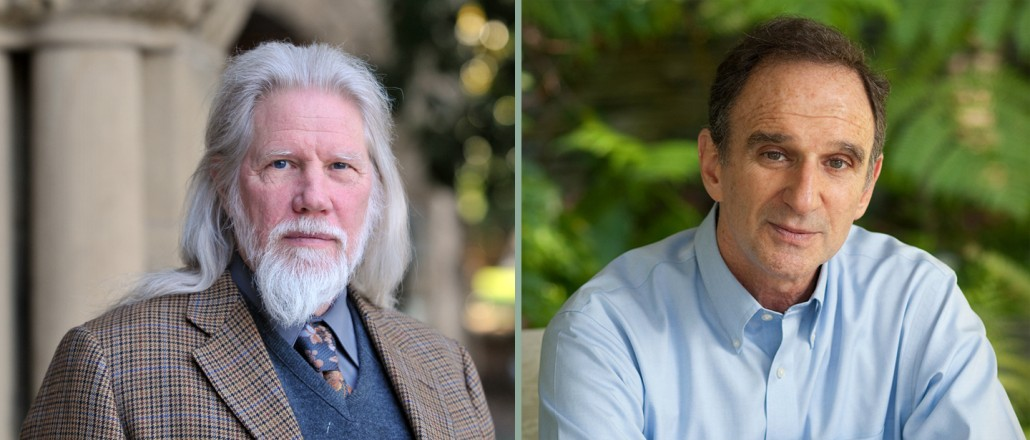

In [3]:
IMG1 = os.path.join('..','DATA','diffie_hellman_turing-1030x440.jpg')
Image(filename=IMG1)

A troca de chaves de Diffie-Hellman é uma forma de compartilhar um segredo entre duas pessoas de tal forma que o segredo não possa ser visto por observadores indesejáveis nos canais de comunicação. Esse processo é um dos pilares da criptografia assimétrica. 

Isso é particularmente útil porque você pode usar essa técnica para criar uma chave de criptografia com alguém e, em seguida, comece a criptografar seu tráfego com essa chave. E mesmo que o tráfego seja gravado e posteriormente analisado, não há como descobrir qual era a chave, mesmo que as trocas que o criaram possam ter sido visíveis. Ninguém analisando o tráfego em uma data posterior pode invadir porque a chave nunca foi guardada, nunca transmitida e nunca visível em qualquer lugar.

## A ideia

In [4]:
Image(url="https://upload.wikimedia.org/wikipedia/commons/3/35/Diffie-Hellman_Key_Exchange-modified.png")

* **Alice** e **Bob** compartilham um número primo $p$ e um inteiro $g$ (módulo $p$).
    1. $p, g$ são conhecidos por todos com acesso ao canal.
    <br>
    <br>
* **Alice** computa uma chave secreta $a < p$ de forma aleatória. 
    1. **Alice**, então, computa $A = g^a \pmod{p}$.
    2. **Alice** envia $A$ para **Bob** através do canal de comunicação.
    <br>
    <br>
* **Bob** computa uma chave secreta $b < p$ de forma aleatória. 
    1. **Bob**, então, computa $B = g^b \pmod{p}$.
    2. **Bob** envia $B$ para **Alice** através do canal de comunicação.
    <br>
    <br>
* **Alice** e **Bob** computam as seguintes chaves secretas:
    1. **Bob** computa $$K = A^b \pmod{p} \equiv (g^a)^b \pmod{p} $$
    2. **Alice** computa $$K = B^a \pmod{p} \equiv (g^b)^a \pmod{p} $$

## Implementação

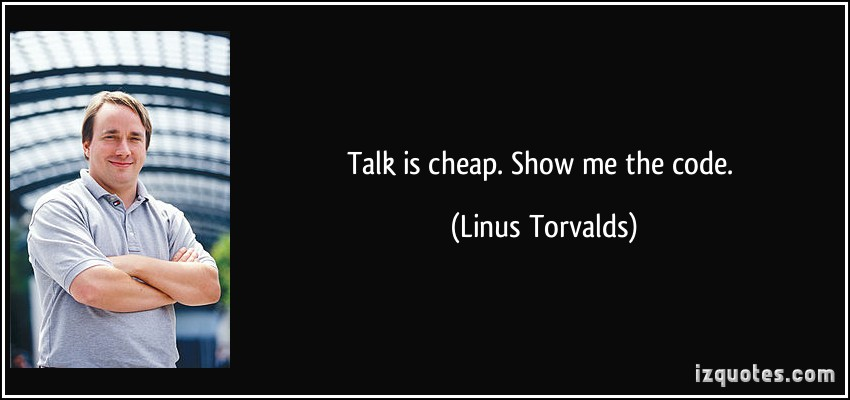

In [5]:
IMG2 = os.path.join('..','DATA','linus-quote.jpg')
Image(filename=IMG2)

Alice e Bob combinam que $p$ será o primeiro primo depois de $2^{1000}$ e $g = 3 \pmod{p}$.

In [6]:
p = next_prime(2^1000)
p

10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069673

In [7]:
g = mod(3, p)
g

3

-------------

### Alice

In [8]:
a = ZZ.random_element(p)

In [9]:
print("Chave secreta de Alice: ")
a

Chave secreta de Alice: 


5711536256895496032008877295455031754460259562570558209181979099539877572093928919942767610084470241701771149725187588504819984257071321392023910084462468407247639936386297540921119260396143338702267728288355826047794152756659839747006182617906089797645204312201113117110942556052611157163791940600771

In [10]:
A = g^a

In [11]:
print("Chave pública de Alice:")
A

Chave pública de Alice:


10220176617599732878083703718409607839107417680289695630305442011807728521830237337959971078887818152460682312798339871266505530935285311666894748217215221891317734345245703515453308797773792427578708699141945420538470980927389331744565619456486984597340636412963921668107034741344431596742645964221517

----------------

### Bob


In [12]:
b = ZZ.random_element(p)

In [14]:
print("Chave secreta de Bob: ")
b

Chave secreta de Bob: 


7827459415129233599179740299564467737945467613846221484633758514639348600421557987110331476697987511583363119406584150602723097249530367494711224692208692609423909651763195637926647174199954165621650344831336087354322448162016877247418529893415034632313699319265649879183345174476345565624189361225987

In [16]:
B = g^b

In [17]:
print("Chave pública de Bob: ")
B

Chave pública de Bob: 


10233053849413633395863476118777800065851155214505056719078452850491841068894055896897718449659459299769594399072124355936762678589279290933160090657677673718384938039816301001304180232873272325228154817818883196635925010556857387235657863840259432621829100536767857514018031572629342230070140666216348

----------

### Troca de Chaves

In [18]:
# Alice computa
K_A = B^a

In [19]:
# Bob computa
K_B = A^b

In [20]:
K_A
K_B

5785487361481708522397434281667759721026484606197354819137440205132160290819597807692276094813311902513493106185909196367980343431723887297178123750833558089942586443556539823353506382001372199375416089924310197998174710469962939443808185560308091662342926713402627799204235506450535183723023311998361

5785487361481708522397434281667759721026484606197354819137440205132160290819597807692276094813311902513493106185909196367980343431723887297178123750833558089942586443556539823353506382001372199375416089924310197998174710469962939443808185560308091662342926713402627799204235506450535183723023311998361

In [21]:
K_A == K_B

True

--------

# Logaritmos Discretos

* Logaritmo normal
    $$ \log_{b}{a} = x \iff a^x =  b$$
    
* Logaritmo discreto
    $$ \log_{b}{a} \equiv x \pmod{p} \iff a^x \equiv b \pmod{p} $$

# Problema de Diffie-Hellman

Informações transmitidas publicamente: $p, g, A, B$.

Problema: Descobrir $a$ ou $b$ a partir dos dados públicos. 